In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
feature_selection_data = pd.read_csv("../data/final_encoded_data.csv")
feature_selection_data.head()

,age,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,gender_Male,gender_Other
0,23,0.0,1.2,1.1,0,85.0,8.0,2,6,3,2,8,1,56.2,0,0
1,20,6.9,2.8,2.3,0,97.3,4.6,3,6,1,2,8,0,100.0,0,0
2,21,1.4,3.1,1.3,0,94.8,8.0,1,1,1,1,1,0,34.3,1,0
3,23,1.0,3.9,1.0,0,71.0,9.2,1,4,3,3,1,1,26.8,0,0
4,19,5.0,4.4,0.5,0,90.9,4.9,2,3,3,3,1,0,66.4,0,0


In [17]:
feature_selection_data.shape

(1000, 16)

In [18]:
feature_selection_data.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score',
       'gender_Male', 'gender_Other'],
      dtype='str')

<Axes: >

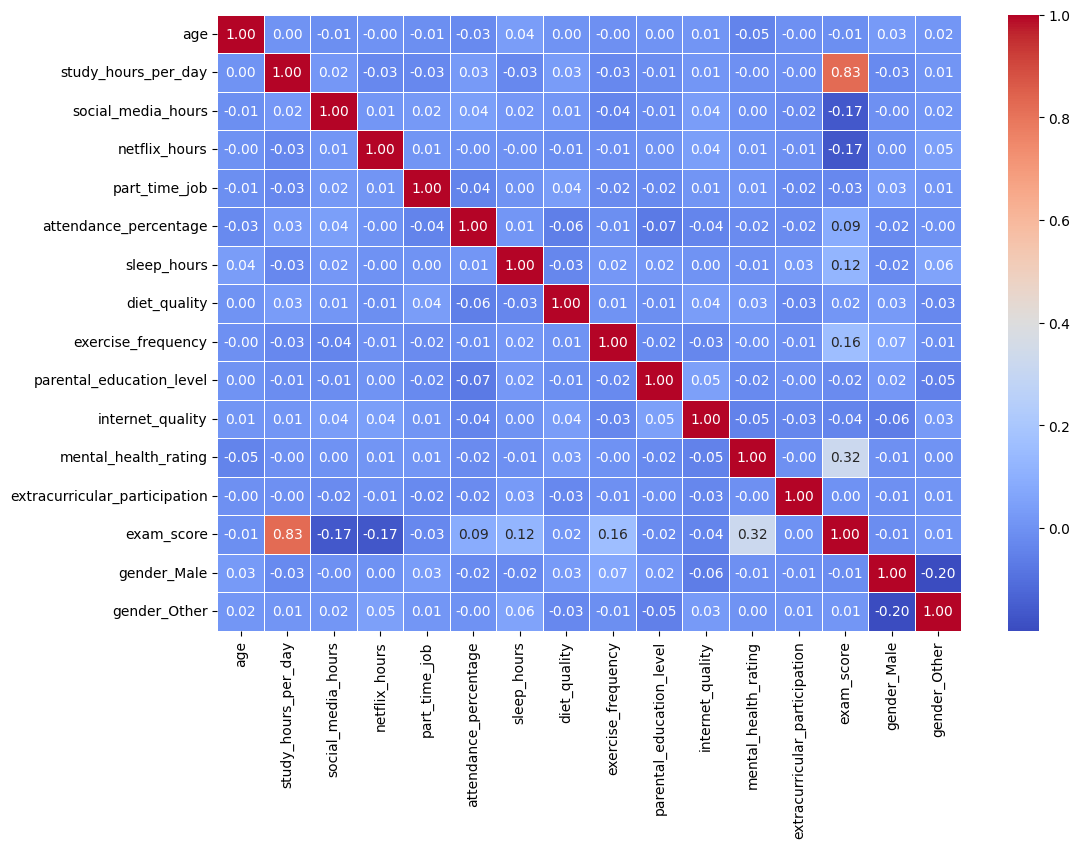

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(feature_selection_data.corr(), annot=True, cmap="coolwarm",fmt=".2f", linewidths=0.5)

In [20]:
corr_matrix = feature_selection_data.corr()

# See exactly how each feature correlates with the exam score
target_corr = corr_matrix['exam_score'].sort_values(ascending=False)

print("Correlation with Exam Score:")
print(target_corr)

Correlation with Exam Score:
exam_score                       1.000000
study_hours_per_day              0.825419
mental_health_rating             0.321523
exercise_frequency               0.160107
sleep_hours                      0.121683
attendance_percentage            0.089836
diet_quality                     0.015018
gender_Other                     0.012976
extracurricular_participation    0.000881
age                             -0.008907
gender_Male                     -0.013191
parental_education_level        -0.021129
part_time_job                   -0.026608
internet_quality                -0.036298
social_media_hours              -0.166733
netflix_hours                   -0.171779
Name: exam_score, dtype: float64


In [21]:
target = 'exam_score'

# Get absolute correlation values for the target
correlations = feature_selection_data.corr()[target].abs()

# Filter features: Keep those with correlation > 0.05
# We always keep the target itself!
selected_features = correlations[correlations > 0.05].index.tolist()

# Create the final dataframe with only selected columns
df_final = feature_selection_data[selected_features]

print(f"Original feature count: {feature_selection_data.shape}")
print(f"Selected feature count: {df_final.shape}")
print(f"\nSelected Columns:\n{df_final.columns}")

Original feature count: (1000, 16)
Selected feature count: (1000, 8)

Selected Columns:
Index(['study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'exam_score'],
      dtype='str')


In [24]:
df_final.to_csv('../data/final_features_selection_data.csv', index=False)


This is for featuresSelection.py

In [23]:
def features_selection(feature_selection_data: pd.DataFrame) -> pd.DataFrame:
    target = 'exam_score'

    # Get absolute correlation values for the target
    correlations = feature_selection_data.corr()[target].abs()

    # Filter features: Keep those with correlation > 0.05
    # We always keep the target itself!
    selected_features = correlations[correlations > 0.05].index.tolist()

    # Create the final dataframe with only selected columns
    df_final = feature_selection_data[selected_features]

    print(f"Original feature count: {feature_selection_data.shape}")
    print(f"Selected feature count: {df_final.shape}")
    print(f"\nSelected Columns:\n{df_final.columns}")

    return df_final